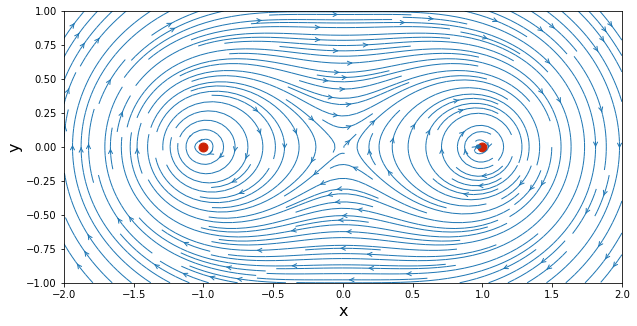

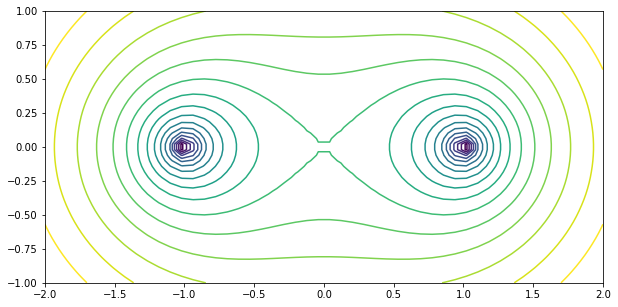

In [3]:
import numpy
import math
from matplotlib import pyplot
# embed the figures into the notebook
%matplotlib inline

N = 50                                # Number of points in each direction
x_start, x_end = -2.0, 2.0            # x-direction boundaries
y_start, y_end = -1.0, 1.0            # y-direction boundaries
x = numpy.linspace(x_start, x_end, N)    # computes a 1D-array for x
y = numpy.linspace(y_start, y_end, N)    # computes a 1D-array for y
X, Y = numpy.meshgrid(x, y)              # generates a mesh grid

gamma = 1.0                      # strength of the vortex
x_vortex1, y_vortex1 = -1.0, 0.0 # location of the vortex1
x_vortex2, y_vortex2 = 1.0, 0.0 # location of the vortex2

def get_velocity_vortex(strength, xv, yv, X, Y):
    u = + strength/(2*math.pi)*(Y-yv)/((X-xv)**2+(Y-yv)**2)
    v = - strength/(2*math.pi)*(X-xv)/((X-xv)**2+(Y-yv)**2)
    return u, v

def get_stream_function_vortex(strength, xv, yv, X, Y):
    psi = strength/(4*math.pi)*numpy.log((X-xv)**2+(Y-yv)**2)
    return psi

# compute the velocity field on the mesh grid
u_vortex1, v_vortex1 = get_velocity_vortex(gamma, x_vortex1, y_vortex1, X, Y)
u_vortex2, v_vortex2 = get_velocity_vortex(gamma, x_vortex2, y_vortex2, X, Y)

# compute the stream-function on the mesh grid
psi_vortex1 = get_stream_function_vortex(gamma, x_vortex1, y_vortex1, X, Y)
psi_vortex2 = get_stream_function_vortex(gamma, x_vortex2, y_vortex2, X, Y)

u_vortex=u_vortex1+u_vortex2;v_vortex=v_vortex1+v_vortex2
psi_vortex=psi_vortex1+psi_vortex2

size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u_vortex, v_vortex, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter([x_vortex1,x_vortex2], [y_vortex1,y_vortex2], color='#CD2305', s=80, marker='o');

size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.contour(X,Y,psi_vortex,20)


In [12]:
t=0
tf=5.0

dt=0.1
tf=10

strength=1.0

x0_e,y0_e = -1.0,0.0
x1_e,y1_e = 1.0,0.0

x0_rk,y0_rk = -1.0,0.0
x1_rk,y1_rk = 1.0,0.0

xa0,ya0 = -1,0
xa1,ya1 = 1,0

def velocity_function(x0,y0,x1,y1):
    vx0=(y0-y1)/((x0-x1)**2 + (y0-y1)**2)
    vy0=-(x0-x1)/((x0-x1)**2 + (y0-y1)**2)
    return vx0,vy0

def Eu_int(f,dt,xv1,yv1,xv2,yv2):
    u,v=f(xv1,yv1,xv2,yv2)
    xv1=xv1+dt*u
    yv1=yv1+dt*v
    return xv1,yv1  

def RK2_int(f,dt,xv1,yv1,xv2,yv2):
    u,v=f(xv1,yv1,xv2,yv2)
    xvk1=dt*u
    yvk1=dt*v
    u,v=f(xv1,yv1,xv1+xvk1,yv1+xvk1)
    xvk2=dt*u
    yvk2=dt*v
    xv1=xv1+0.5*(xvk1+xvk2)
    yv1=yv1+0.5*(xvk1+xvk2)
    return xv1,yv1  



x0_te,y0_te=[x0_e],[y0_e]
x1_te,y1_te=[x1_e],[y1_e]

x0_trk,y0_trk=[x0_rk],[y0_rk]
x1_trk,y1_trk=[x1_rk],[y1_rk]


while t<tf:
    x0_e,y0_e=Eu_int(velocity_function,dt,x0_e,y0_e,x1_e,y1_e)
    x1_e,y1_e=Eu_int(velocity_function,dt,x1_e,y1_e,x0_e,y0_e)
    x0_te.append(x0_e)
    y0_te.append(y0_e)
    
    x0_rk,y0_rk=RK2_int(velocity_function,dt,x0_rk,y0_rk,x1_rk,y1_rk)
    x1_rk,y1_rk=RK2_int(velocity_function,dt,x1_rk,y1_rk,x0_rk,y0_rk)
    
    x0_trk.append(x0_rk)
    y0_trk.append(x0_rk)
   
    t+=dt

    
pyplot.title("Motion of vortices using Euler Integrator")    
pyplot.scatter((x0_te+x1_te),(y0_te+y1_te))
pyplot.xlim(-0.5,1.5)
pyplot.ylim(-0.5,1.5)

pyplot.figure(2)    
pyplot.title("Motion of vortices using Euler Integrator")    
pyplot.scatter((x0_trk+x1_trk),(y0_trk+y1_trk))

  

ZeroDivisionError: float division by zero

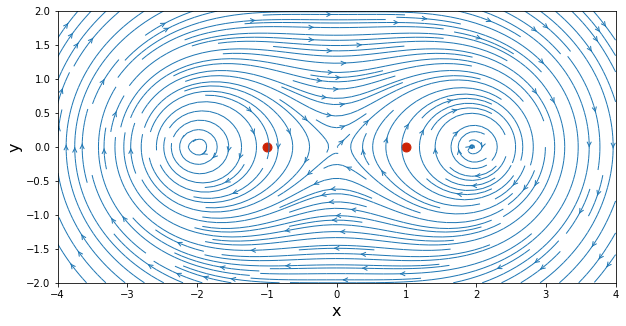

In [9]:
import numpy
import math
from matplotlib import pyplot  


def Eu_int(fprime,dt,z):
    dW=fprime(z)
    xold,yold=z.real,z.imag
    u,v=dW.real,-dW.imag
    xnew=xold+dt*u
    ynew=yold+dt*v
    znew=xnew+1j*ynew
    return znew

def RK2_int(fprime,dt,z):
    xold,yold=z.real,z.imag
    dW=fprime(z)
    u,v=dW.real,-dW.imag
    xk1=dt*u
    yk1=dt*v
    zk1=(xold+xk1)+1j*(yold+yk1)
    dW=fprime(zk1)
    u,v=dW.real,-dW.imag
    xk2=dt*u
    yk2=dt*v
    xnew=xold+0.5*(xk1+xk2)
    ynew=yold+0.5*(yk1+yk2)
    znew=xnew+1j*ynew
    return znew

def fW(z):
    return 1j*Gamma/(2*numpy.pi)*numpy.log(z/zs)

def dWdz(z):
    return 1j*Gamma/(2*numpy.pi*z)

N = 50                                # Number of points in each direction
x_start, x_end = -4.0, 4.0            # x-direction boundaries
y_start, y_end = -2.0, 2.0            # y-direction boundaries
x = numpy.linspace(x_start, x_end, N)    # computes a 1D-array for x
y = numpy.linspace(y_start, y_end, N)    # computes a 1D-array for y
X, Y = numpy.meshgrid(x, y)              # generates a mesh grid

Z=X+1j*Y
Gamma=1.0

W=fW(Z)

dW=dWdz(Z)
u=dW.real
v=-dW.imag

size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u_vortex, v_vortex, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter([x_vortex1,x_vortex2], [y_vortex1,y_vortex2], color='#CD2305', s=80, marker='o');
